In [3]:
# The basic libraries
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
import math
# import pydotplus
import seaborn as sns # for visualization
import statsmodels.api as sm
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

from sklearn import tree
from sklearn import neighbors, datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from statsmodels.formula.api import ols

# Error Handling
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

# Neural Networks
import tensorflow as tf # This tells Colab that we are using TensorFlow
from tensorflow import keras # This is the main TensorFlow library
from tensorflow.keras import layers # We are building a Neural Network with several hidden layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense
print("Current TensorFlow version is", tf.__version__)

#Clustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
plt.style.use('ggplot')

# EDA
#!pip install -U ydata-profiling[notebook,unicode]
#from ydata_profiling import ProfileReport # Now we load the package

Current TensorFlow version is 2.13.0


In [136]:
steam = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/steam_games.csv")
steam.head()

,AppID,Name,Developer,Publisher,Genre,Categories,Owners,Positive_Reviews,Negative_Reviews,Price_USD,Initial_Price_USD,Discount_Percent,Peak_Concurrent_Players,Platforms,Release_Date,Required_Age,Avg_Rating_5,Playability_Index_10
0,10,Counter-Strike,Valve,Valve,Action,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",201215,5199,9.99,9.99,0,13990,"windows, mac, linux",11/1/2000,0,3.87,6.54
1,20,Team Fortress Classic,Valve,Valve,Action,"Multi-player, Valve Anti-Cheat enabled, Online...","1,000,000 .. 2,000,000",5835,934,4.99,4.99,0,101,"windows, mac, linux",4/1/1999,0,3.92,8.15
2,30,Day of Defeat,Valve,Valve,Action,"Multi-player, Valve Anti-Cheat enabled","5,000,000 .. 10,000,000",5251,569,4.99,4.99,0,142,"windows, mac, linux",5/1/2003,0,4.90,7.25
3,40,Deathmatch Classic,Valve,Valve,Action,"Multi-player, Valve Anti-Cheat enabled, Online...","5,000,000 .. 10,000,000",1961,437,4.99,4.99,0,3,"windows, mac, linux",6/1/2001,0,4.69,8.12
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,Action,"Multi-player, Single-player, Valve Anti-Cheat ...","5,000,000 .. 10,000,000",14887,756,4.99,4.99,0,106,"windows, mac, linux",11/1/1999,0,2.84,2.35


In [94]:
# steam = steam[steam['Required_Age'] == 18.0]
# steam.head()

In [95]:
steam.groupby(['Platforms']).median()

,AppID,Positive_Reviews,Negative_Reviews,Price_USD,Initial_Price_USD,Discount_Percent,Peak_Concurrent_Players,Required_Age,Avg_Rating_5,Playability_Index_10
Platforms,,,,,,,,,,
linux,364380.0,75.0,47.0,29.99,29.99,0.0,0.0,0.0,4.44,5.390
mac,303335.0,215.0,160.5,0.00,0.00,0.0,1.0,0.0,3.63,4.865
windows,375290.0,78.0,35.0,4.99,5.99,0.0,0.0,0.0,3.52,5.130
"windows, linux",376750.0,71.0,31.0,4.99,4.99,0.0,0.0,0.0,3.50,4.790
"windows, mac",358395.0,141.5,49.0,5.99,6.99,0.0,0.0,0.0,3.54,4.890
"windows, mac, linux",347280.0,244.0,68.0,7.99,8.99,0.0,1.0,0.0,3.50,4.930


In [96]:
steam1 = steam[['Price_USD','Positive_Reviews', 'Peak_Concurrent_Players','Avg_Rating_5']]
train,test = train_test_split(steam1,test_size=0.2)
print('Number of rows in train is - {0}'.format(train.shape[0]))
print('Number of rows in test is - {0} '.format(test.shape[0]))

Number of rows in train is - 8900
Number of rows in test is - 2226 


In [97]:
steam.groupby('Platforms').mean()['Avg_Rating_5']

Platforms
linux                  4.440000
mac                    3.630000
windows                3.504317
windows, linux         3.518459
windows, mac           3.535374
windows, mac, linux    3.502031
Name: Avg_Rating_5, dtype: float64

<Axes: title={'center': 'Avg_Rating_5'}, xlabel='Platforms'>

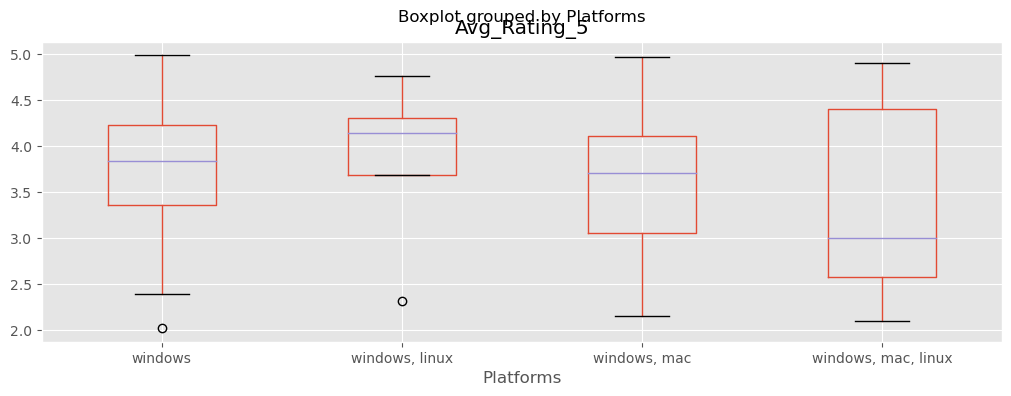

In [69]:
steam.boxplot(column='Avg_Rating_5', by='Platforms',figsize=(12,4))

In [30]:
steam.Platforms.value_counts()

windows                6783
windows, mac, linux    2565
windows, mac           1470
windows, linux          305
mac                       2
linux                     1
Name: Platforms, dtype: int64

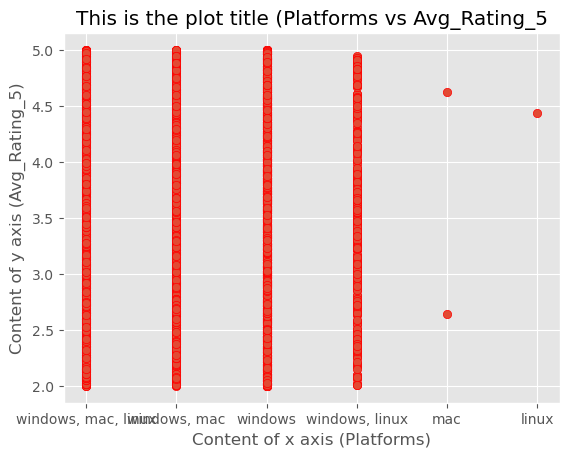

In [9]:
# Setting up the x and y axes of the plot
x = steam[('Platforms')]
y = steam[('Avg_Rating_5')]

# Building the plot with red outlines for better visibility
plt.scatter(x, y, edgecolors='r')

# NO PLOT WITHOUT LABELS AND TITLE--EVER!!!!!!!
plt.xlabel('Content of x axis (Platforms)')
plt.ylabel('Content of y axis (Avg_Rating_5)')
plt.title('This is the plot title (Platforms vs Avg_Rating_5')
plt.show()

In [105]:
bins3 = np.linspace(steam.Price_USD.min(),steam.Price_USD.max(),4)
print(bins3)
labels = ['low', 'medium', 'high']
steam['bins'] = pd.cut(steam['Price_USD'], bins=bins3, labels=labels, include_lowest=True)
steam.head()

[  0.          99.96666667 199.93333333 299.9       ]


,AppID,Name,Developer,Publisher,Genre,Categories,Owners,Positive_Reviews,Negative_Reviews,Price_USD,Initial_Price_USD,Discount_Percent,Peak_Concurrent_Players,Platforms,Release_Date,Required_Age,Avg_Rating_5,Playability_Index_10,bins
0,10,Counter-Strike,Valve,Valve,Action,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",201215,5199,9.99,9.99,0,13990,"windows, mac, linux",11/1/2000,0,3.87,6.54,low
1,20,Team Fortress Classic,Valve,Valve,Action,"Multi-player, Valve Anti-Cheat enabled, Online...","1,000,000 .. 2,000,000",5835,934,4.99,4.99,0,101,"windows, mac, linux",4/1/1999,0,3.92,8.15,low
2,30,Day of Defeat,Valve,Valve,Action,"Multi-player, Valve Anti-Cheat enabled","5,000,000 .. 10,000,000",5251,569,4.99,4.99,0,142,"windows, mac, linux",5/1/2003,0,4.90,7.25,low
3,40,Deathmatch Classic,Valve,Valve,Action,"Multi-player, Valve Anti-Cheat enabled, Online...","5,000,000 .. 10,000,000",1961,437,4.99,4.99,0,3,"windows, mac, linux",6/1/2001,0,4.69,8.12,low
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,Action,"Multi-player, Single-player, Valve Anti-Cheat ...","5,000,000 .. 10,000,000",14887,756,4.99,4.99,0,106,"windows, mac, linux",11/1/1999,0,2.84,2.35,low


In [81]:
steam['play_buckets'] = np.where(steam['Playability_Index_10']<8.0,'bad','good')
steam.head()

,AppID,Name,Developer,Publisher,Genre,Categories,Owners,Positive_Reviews,Negative_Reviews,Price_USD,Initial_Price_USD,Discount_Percent,Peak_Concurrent_Players,Platforms,Release_Date,Required_Age,Avg_Rating_5,Playability_Index_10,bins,play_buckets
981,55150,"Warhammer 40,000: Space Marine - Anniversary E...",Relic Entertainment,SEGA,Action,"Multi-player, Single-player, Steam Achievement...","2,000,000 .. 5,000,000",18944,1687,59.99,59.99,0,172,windows,9/5/2011,18,4.03,9.73,high,good
1358,207040,Sine Mora,Digital Reality,HandyGames,"Action, Indie","Single-player, Steam Achievements, Steam Cloud...","100,000 .. 200,000",758,171,9.99,9.99,0,1,windows,11/9/2012,18,4.15,1.91,low,bad
1546,218620,PAYDAY 2,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,"Action, RPG","Multi-player, Single-player, Co-op, Steam Achi...","20,000,000 .. 50,000,000",532013,63096,9.99,9.99,0,40874,"windows, linux",8/13/2013,18,4.15,7.79,low,bad
1618,223470,POSTAL 2,Running With Scissors,Running With Scissors,"Action, Adventure, Indie","Single-player, Includes level editor, Steam Ac...","5,000,000 .. 10,000,000",72120,2821,9.99,9.99,0,322,"windows, mac, linux",11/2/2012,18,2.58,7.08,low,bad
1743,232770,POSTAL,Running With Scissors,Running With Scissors,"Action, Indie","Single-player, Steam Achievements, Full contro...","5,000,000 .. 10,000,000",5171,745,19.97,19.97,0,14,"windows, mac, linux",11/14/1997,18,3.50,5.12,low,bad


In [82]:
X = steam[['Price_USD','Avg_Rating_5','Required_Age']] 
y = steam['play_buckets']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (54, 3)
y_train shape: (54,)


In [83]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  92.85714285714286 %


In [148]:
X = steam[['Price_USD','Avg_Rating_5','Required_Age']] 
y = steam['Owners'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)
# print("X_train shape: {}".format(X_train.shape))
# print("y_train shape: {}".format(y_train.shape))

# means = np.mean(X_train, axis=0)
# std = np.std(X_train, axis=0)
 
# X_train = (X_train - means)/std
# X_test = (X_test - means)/std

model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print("Test set score: {:.4f}".format(model1.score(X_test, y_test)))
accuracy_score(y_test,y_pred)

Test set score: 0.2273


0.22731356693620844

In [149]:
# Model with k=25

model25 = KNeighborsClassifier(n_neighbors = 25)
model25.fit(X_train, y_train)
y_pred25 = model25.predict(X_test)
print("Test set score: {:.4f}".format(model25.score(X_test, y_test)))
accuracy_score(y_test,y_pred25)

Test set score: 0.3607


0.3607367475292004

In [150]:
# Model with k=200

model200 = KNeighborsClassifier(n_neighbors = 200)
model200.fit(X_train, y_train)
y_pred200 = model200.predict(X_test)
print("Test set score: {:.4f}".format(model200.score(X_test, y_test)))
accuracy_score(y_test,y_pred200)

Test set score: 0.3792


0.37915543575920935

In [111]:
ins_naivebayes = GaussianNB()
ins_naivebayes.fit(X_train, y_train)
ins_predictions = ins_naivebayes.predict(X_test)
print("Test set score: {:.4f}".format(accuracy_score(y_test, ins_predictions)))
ins_naivebayes.score(X_test,y_test)

Test set score: 0.3446


0.3445642407906559

In [102]:
steam.groupby(['Owners','Platforms']).median()

AppID  Positive_Reviews  \
Owners                     Platforms                                         
0 .. 20,000                windows              451630.0              13.0   
                           windows, linux       429020.0              15.5   
                           windows, mac         399910.0              21.0   
                           windows, mac, linux  391675.0              29.0   
1,000,000 .. 2,000,000     windows              233290.0           10665.0   
                           windows, linux       333420.0           10205.0   
                           windows, mac         261030.0           10675.0   
                           windows, mac, linux  262280.0           12939.0   
10,000,000 .. 20,000,000   windows              298040.0          121736.5   
                           windows, mac         444145.0          222917.5   
                           windows, mac, linux    8930.0          180580.0   
100,000 .. 200,000         windows              314050.0             447.0   
                           windows, linux       354440.0             249.0   
                           windows, mac         345090.0             576.0   
                           windows, mac, linux  313185.0             711.5   
2,000,000 .. 5,000,000     windows              220640.0           30575.0   
                           windows, linux       246495.0           35857.0   
                           windows, mac         268910.0           35292.0   
                           windows, mac, linux  247080.0           39334.0   
20,000 .. 50,000           linux                364380.0              75.0   
                           windows              356265.0              83.0   
                           windows, linux       398575.0              92.0   
                           windows, mac         358430.0             113.5   
                           windows, mac, linux  356180.0             115.0   
20,000,000 .. 50,000,000   windows              315570.0          752003.0   
                           windows, linux       218620.0          532013.0   
                           windows, mac         252490.0          254203.0   
                           windows, mac, linux   54800.0          547753.5   
200,000 .. 500,000         windows              292620.0            1223.0   
                           windows, linux       296870.0            1216.0   
                           windows, mac         306200.0            1383.5   
                           windows, mac, linux  297745.0            1811.5   
200,000,000 .. 500,000,000 windows, mac, linux     570.0         1534895.0   
5,000,000 .. 10,000,000    windows              253710.0           66646.0   
                           windows, linux       225050.0           41748.5   
                           windows, mac         306130.0          102825.0   
                           windows, mac, linux  233110.0           56112.5   
50,000 .. 100,000          mac                  303335.0             215.0   
                           windows              328070.0             185.0   
                           windows, linux       375370.0             214.0   
                           windows, mac         337990.0             254.5   
                           windows, mac, linux  341860.0             325.0   
50,000,000 .. 100,000,000  windows, mac, linux     585.0         3394876.0   
500,000 .. 1,000,000       windows              270680.0            3607.5   
                           windows, linux       275260.0            6306.0   
                           windows, mac         250500.0            4443.5   
                           windows, mac, linux  291865.0            5245.0   

                                                Negative_Reviews  Price_USD  \
Owners                     Platforms                                          
0 .. 20,000                windows                           5.0      

<Axes: >

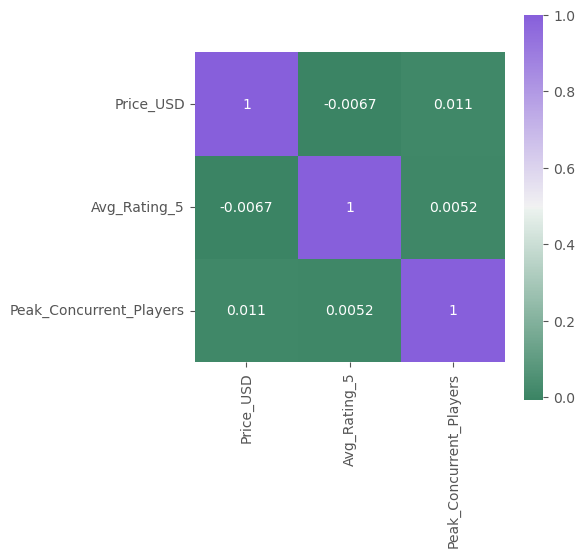

In [58]:
corr = steam[['Price_USD','Avg_Rating_5','Peak_Concurrent_Players']].corr()
corr

f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = bool), annot=True,
            cmap = sns.diverging_palette(150, 275, as_cmap = True), square = True, ax = ax)

# sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [60]:
steam_dl = steam[['Price_USD','Avg_Rating_5','Required_Age','Owners']]
steam_dl.head()

,Price_USD,Avg_Rating_5,Required_Age,Owners
0,9.99,3.87,0,"10,000,000 .. 20,000,000"
1,4.99,3.92,0,"1,000,000 .. 2,000,000"
2,4.99,4.90,0,"5,000,000 .. 10,000,000"
3,4.99,4.69,0,"5,000,000 .. 10,000,000"
4,4.99,2.84,0,"5,000,000 .. 10,000,000"


In [63]:
steam_dl.Owners.nunique()

13

In [144]:
X = steam[['Price_USD','Avg_Rating_5','Required_Age']] 
y = steam['Owners'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

means = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
 
X_train = (X_train - means)/std
X_test = (X_test - means)/std



X_train shape: (8900, 3)
y_train shape: (8900,)


In [145]:
rf = RandomForestClassifier(n_estimators=10,verbose=1, criterion='entropy')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.25471698113207547

In [146]:
rf100 = RandomForestClassifier(n_estimators=100,verbose=1, criterion='entropy')
rf100.fit(X_train,y_train)
y_pred100 = rf100.predict(X_test)
accuracy_score(y_test, y_pred100)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.2529200359389039

In [147]:
rf1000 = RandomForestClassifier(n_estimators=1000,verbose=1, criterion='entropy')
rf1000.fit(X_train,y_train)
y_pred1000 = rf1000.predict(X_test)
accuracy_score(y_test, y_pred1000)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   36.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.6s finished


0.25426774483378256

In [139]:
X = steam[['Price_USD','Positive_Reviews','Peak_Concurrent_Players']] 
y = steam['Avg_Rating_5']

lm = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

means = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
 
X_train = (X_train - means)/std
X_test = (X_test - means)/std

lm.fit(X_train,y_train)
pred_lm = lm.predict(X_train)
print(lm.score(X_test, y_test))

X_train shape: (8900, 3)
X_test shape: (2226, 3)
-0.0010030659006075027
